## 1 .Data and dependecies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# Specify the file path
file_path = 'data/Tab_delimited_text/Hackathon2024.ATAC.txt'
atac = pd.read_csv(file_path, sep='\t')
atac.head()

,peak,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
0,chr1-10109-10357,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,chr1-180730-181630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,chr1-191491-191736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1-267816-268196,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1-586028-586373,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
atac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108344 entries, 0 to 108343
Columns: 3000 entries, peak to TTTGTTGGTCAGGAAG.1
dtypes: int64(2999), object(1)
memory usage: 2.4+ GB


In [4]:
# Specify the file path
file_path = 'data/Tab_delimited_text/Hackathon2024.RNA.txt'
rna = pd.read_csv(file_path, sep='\t')
rna.head()

,gene,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
0,MIR1302-2HG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FAM138A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OR4F5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL627309.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AL627309.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36601 entries, 0 to 36600
Columns: 3000 entries, gene to TTTGTTGGTCAGGAAG.1
dtypes: int64(2999), object(1)
memory usage: 837.7+ MB


In [6]:
atac[atac['peak'] == 'chr1-89196985-89201657']

,peak,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
4445,chr1-89196985-89201657,0,0,0,0,0,0,2,0,0,...,2,0,0,0,0,2,0,0,0,0


In [7]:
rna[rna['gene'] == 'GBP2']

,gene,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
1433,GBP2,4,0,4,0,2,1,0,3,1,...,1,1,0,2,1,3,1,1,6,0


## 2. Pearson Correlation

In [8]:
# Specify the file path
file_path = 'data/Tab_delimited_text/Hackathon2024.Training.Set.Peak2Gene.Pairs.txt'
data = pd.read_csv(file_path, sep='\t')
data.head()

,peak,gene,Pair,Peak2Gene
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,True
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,True


In [9]:
def calculate_correlation(peak_series, gene_series, atac, rna):
    correlations = []

    for peak, gene in zip(peak_series, gene_series):
        atac_filtered = atac[atac['peak'] == peak].drop(columns=['peak'])
        rna_filtered = rna[rna['gene'] == gene].drop(columns=['gene'])
        
        atac_values = atac_filtered.values.flatten()
        rna_values = rna_filtered.values.flatten()
        
        if len(atac_values) == len(rna_values):
            correlation, _ = pearsonr(atac_values, rna_values)
            correlations.append(correlation)
        else:
            correlations.append(None)  # Handle length mismatch

    return correlations

In [10]:
data['pearson_correlation'] = calculate_correlation(data['peak'], data['gene'], atac, rna)
data

,peak,gene,Pair,Peak2Gene,pearson_correlation
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True,0.083005
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True,0.102732
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True,0.118542
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,True,0.254281
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,True,0.085944
...,...,...,...,...,...
295,chr1-151593645-151594727,SNX27,chr1-151593645-151594727_SNX27,False,0.016749
296,chr14-52692182-52692881,PSMC6,chr14-52692182-52692881_PSMC6,False,0.012532
297,chr19-45527935-45529784,FOSB,chr19-45527935-45529784_FOSB,False,-0.018012
298,chr17-32352719-32356100,ZNF207,chr17-32352719-32356100_ZNF207,False,0.012057


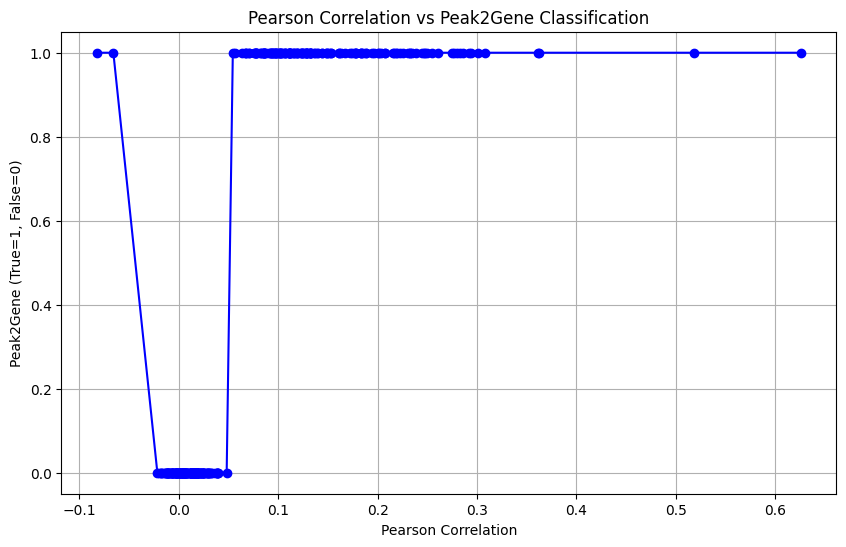

In [11]:
# Convert Peak2Gene to numerical (1 for True, 0 for False)
data['Peak2Gene_num'] = data['Peak2Gene'].astype(int)

# Sort by Pearson Correlation
data_sorted = data.sort_values(by='pearson_correlation')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['pearson_correlation'], data_sorted['Peak2Gene_num'], marker='o', linestyle='-', color='b')
plt.xlabel('Pearson Correlation')
plt.ylabel('Peak2Gene (True=1, False=0)')
plt.title('Pearson Correlation vs Peak2Gene Classification')
plt.grid(True)
plt.show()

In [12]:
# Filter for Peak2Gene = False
data_false = data[data['Peak2Gene'] == False]

# Find minimum and maximum Pearson correlation
min_correlation = data_false['pearson_correlation'].min()
max_correlation = data_false['pearson_correlation'].max()

print("Min Pearson Correlation where Peak2Gene = False:", min_correlation)
print("Max Pearson Correlation where Peak2Gene = False:", max_correlation)

Min Pearson Correlation where Peak2Gene = False: -0.021541738459187783
Max Pearson Correlation where Peak2Gene = False: 0.048186669074446416


In [13]:
# Filter for Peak2Gene = False and Pearson correlation > 0
filtered_data = data[(data['Peak2Gene'] == True) & (data['pearson_correlation'] > 0)]

# Find minimum and maximum Pearson correlation
min_correlation = filtered_data['pearson_correlation'].min()
max_correlation = filtered_data['pearson_correlation'].max()

print("Min Pearson Correlation where Peak2Gene = False and Pearson correlation > 0:", min_correlation)
print("Max Pearson Correlation where Peak2Gene = False and Pearson correlation > 0:", max_correlation)

Min Pearson Correlation where Peak2Gene = False and Pearson correlation > 0: 0.05436820997623429
Max Pearson Correlation where Peak2Gene = False and Pearson correlation > 0: 0.6260276378221924


In [14]:
filtered_data = data[(data['Peak2Gene'] == True) & (data['pearson_correlation'] < 0)]
filtered_data

,peak,gene,Pair,Peak2Gene,pearson_correlation,Peak2Gene_num
52,chr8-124629413-124631563,MTSS1,chr8-124629413-124631563_MTSS1,True,-0.065819,1
56,chr19-48870759-48885599,FTL,chr19-48870759-48885599_FTL,True,-0.082765,1


In [15]:
# Features and target
X = data[['pearson_correlation']]
y = data['Peak2Gene_num']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


## 3. Matthew Correlation not normalized

In [18]:
data.head()

,peak,gene,Pair,Peak2Gene,pearson_correlation,Peak2Gene_num
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True,0.083005,1
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True,0.102732,1
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True,0.118542,1
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,True,0.254281,1
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,True,0.085944,1


In [19]:
def matthew_corr(peak_series, gene_series, atac, rna):
    correlations = []

    for peak, gene in zip(peak_series, gene_series):
        atac_filtered = atac[atac['peak'] == peak].drop(columns=['peak'])
        rna_filtered = rna[rna['gene'] == gene].drop(columns=['gene'])
        
        atac_values = atac_filtered.values.flatten()
        rna_values = rna_filtered.values.flatten()
        
        if len(atac_values) == len(rna_values):
            correlation = matthews_corrcoef(atac_values, rna_values)
            correlations.append(correlation)
        else:
            correlations.append(None)  # Handle length mismatch

    return correlations

In [20]:
data['matthew_correlation'] = matthew_corr(data['peak'], data['gene'], atac, rna)
data.head()

,peak,gene,Pair,Peak2Gene,pearson_correlation,Peak2Gene_num,matthew_correlation
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True,0.083005,1,0.037865
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True,0.102732,1,0.035744
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True,0.118542,1,0.043346
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,True,0.254281,1,0.014036
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,True,0.085944,1,0.025413


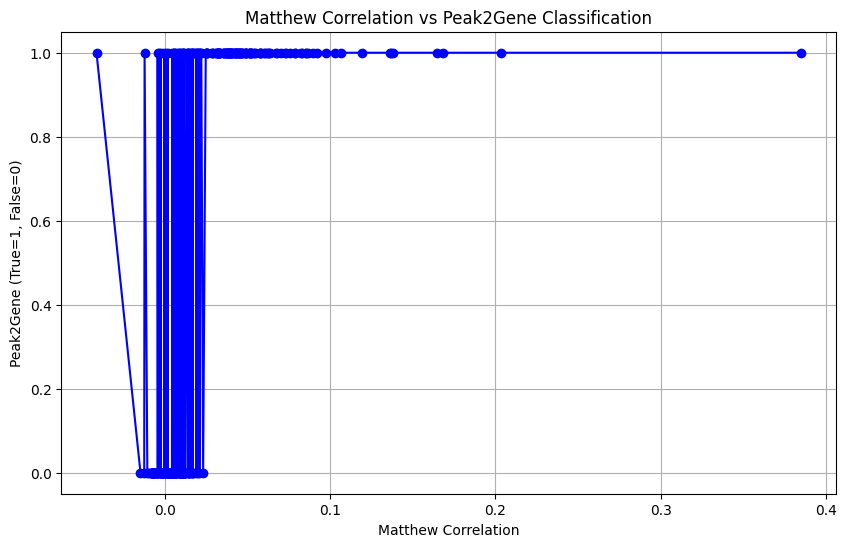

In [21]:
# Sort by Matthew Correlation
data_sorted = data.sort_values(by='matthew_correlation')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['matthew_correlation'], data_sorted['Peak2Gene_num'], marker='o', linestyle='-', color='b')
plt.xlabel('Matthew Correlation')
plt.ylabel('Peak2Gene (True=1, False=0)')
plt.title('Matthew Correlation vs Peak2Gene Classification')
plt.grid(True)
plt.show()

In [22]:
# Features and target
X = data[['matthew_correlation']]
y = data['Peak2Gene_num']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8333333333333334
Precision: 0.7435897435897436
Recall: 1.0
F1 Score: 0.8529411764705882
ROC-AUC: 0.9955506117908788


In [26]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 4, 6, 8, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV without verbose output
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters from GridSearchCV
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
y_pred = best_rf.predict(X_test)

# Probabilities for ROC-AUC
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 200}
Accuracy: 0.9333333333333333
Precision: 0.9310344827586207
Recall: 0.9310344827586207
F1 Score: 0.9310344827586207
ROC-AUC Score: 0.9799777530589544


In [25]:
stop

NameError: name 'stop' is not defined

## 4. Matthew Correlation with added feature engineering

### 4.1 Added total accessibility and total expression

In [28]:
# Add a new column 'total_accessibility' which is the sum of all other columns for each row
atac['total_accessibility'] = atac.drop(columns=['peak']).sum(axis=1)
atac.head()

,peak,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1,total_accessibility
0,chr1-10109-10357,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,27
1,chr1-180730-181630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,78
2,chr1-191491-191736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
3,chr1-267816-268196,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
4,chr1-586028-586373,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,68


In [29]:
data = pd.merge(data, atac[['peak', 'total_accessibility']], on='peak', how='left')
data.head(3)

,peak,gene,Pair,Peak2Gene,pearson_correlation,Peak2Gene_num,matthew_correlation,total_accessibility
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True,0.083005,1,0.037865,1140
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True,0.102732,1,0.035744,2073
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True,0.118542,1,0.043346,1988


In [31]:
# Add a new column 'total_expression' which is the sum of all other columns for each row
rna['total_expression'] = rna.drop(columns=['gene']).sum(axis=1)
rna.head()

,gene,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1,total_expression
0,MIR1302-2HG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FAM138A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OR4F5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL627309.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64
4,AL627309.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data = pd.merge(data, rna[['gene', 'total_expression']], on='gene', how='left')
data.head(3)

,peak,gene,Pair,Peak2Gene,pearson_correlation,Peak2Gene_num,matthew_correlation,total_accessibility,total_expression
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True,0.083005,1,0.037865,1140,6309
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True,0.102732,1,0.035744,2073,4020
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True,0.118542,1,0.043346,1988,2026


### 4.2 Before scaling

In [43]:
# Features and target
X = data[['matthew_correlation', 'total_accessibility', 'total_expression']]
y = data['Peak2Gene_num']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 4, 6, 8, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3, 4, 5],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV without verbose output
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters from GridSearchCV
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
y_pred = best_rf.predict(X_test)

# Probabilities for ROC-AUC
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
Accuracy: 0.9666666666666667
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1 Score: 0.9655172413793104
ROC-AUC Score: 0.9988876529477198


### 4.3 After Scaling

In [38]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Features and target
# X = data[['matthew_correlation', 'total_accessibility', 'total_expression']]
# y = data['Peak2Gene_num']

# # Scale the features
# X_scaled = scaler.fit_transform(X)

# # Continue with your training process
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier()

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],        # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
#     'min_samples_split': [2, 4, 6, 8, 10],       # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 3, 4, 5],         # Minimum number of samples required at a leaf node
#     'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
# }

# # Initialize GridSearchCV without verbose output
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# # Fit the model using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best estimator and parameters from GridSearchCV
# best_rf = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Make predictions
# y_pred = best_rf.predict(X_test)

# # Probabilities for ROC-AUC
# y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# # Calculate and print metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# print("Best Parameters:", best_params)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("ROC-AUC Score:", roc_auc)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9833333333333333
Precision: 0.9666666666666667
Recall: 1.0
F1 Score: 0.9830508474576272
ROC-AUC Score: 0.9988876529477198


In [35]:
file_path = 'data/Tab_delimited_text/Hackathon2024.Meta.txt'
meta = pd.read_csv(file_path, sep='\t')
meta = meta.drop(columns=['CellType'])
meta.rename_axis('CELL', inplace=True)
meta.reset_index(inplace=True)
meta['CELL'] = meta['CELL'].str.replace('-', '.')
meta.head()

,CELL,nCount_RNA,nCount_ATAC
0,AAACCAACACAATGCC.1,5849,16550
1,AAACCAACAGGAACTG.1,5901,25593
2,AAACCAACATAATCCG.1,7975,42743
3,AAACCAACATTGTGCA.1,5525,21760
4,AAACCGCGTACTTCAC.1,10327,76652


In [ ]:
meta = meta.set_index('CELL').T
meta.head()

In [ ]:
# Extract the normalization values from meta where CELL is 'nCount_RNA'
norm_row = meta.loc['nCount_RNA']

# Divide all rows of rna by the corresponding normalization row
rna_normalized = rna.divide(norm_row, axis='columns')

rna_normalized.head(3)

In [ ]:
data['matthew_correlation_normalized'] = matthew_corr(data['peak'], data['gene'], atac, rna)
data.head()

In [ ]:
# Sort by Matthew Correlation
data_sorted = data.sort_values(by='matthew_correlation_normalized')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['matthew_correlation_normalized'], data_sorted['Peak2Gene_num'], marker='o', linestyle='-', color='b')
plt.xlabel('Matthew Correlation normalized')
plt.ylabel('Peak2Gene (True=1, False=0)')
plt.title('Matthew Correlation normalized vs Peak2Gene Classification')
plt.grid(True)
plt.show()

## Export

In [45]:
# Define the conversion function
def convert(test_result):
    return ['TRUE' if value == 1 else 'FALSE' for value in test_result]

file_path = 'data/Tab_delimited_text/Hackathon2024.Testing.Set.Peak2Gene.Pairs.txt'
test_data = pd.read_csv(file_path, sep='\t')
test_data.head(3)

test_data['matthew_correlation'] = matthew_corr(test_data['peak'], test_data['gene'], atac, rna)
test_data = pd.merge(test_data, atac[['peak', 'total_accessibility']], on='peak', how='left')
test_data = pd.merge(test_data, rna[['gene', 'total_expression']], on='gene', how='left')


# Reshape the 'matthew_correlation' column to a 2D DataFrame
test_data['test_result'] = best_rf.predict(test_data[['matthew_correlation', 'total_accessibility', 'total_expression']])

# Apply the conversion function to test_result and assign to Peak2Gene
test_data['Peak2Gene'] = convert(test_data['test_result'])

# Select the desired columns from test_data
test_data_selected = test_data[['peak', 'gene', 'Pair', 'Peak2Gene']]

# Save as a tab-delimited text file
test_data_selected.to_csv('prediction/prediction.csv', sep='\t', index=False)
print('prediction saved')

prediction saved
